In [2]:
# Q1 (a)
import numpy as np 

N = [3, 10, 100, 1000, 10000, 1000000] # Diff N values

jk = [] # empty list that will be our final answer

a = 0 # lower limit
b = 10 # upper limit


def f(x):
    return np.exp(-x) + (x/1000)**3 # integral function

mid = 0.5*(f(a) + f(b))

for i in N:
    
    for j in range(1, i+1):
        
        s = (b - a)/i # step size
        
        step = f(a + j*s) #incremental step
        
        mid = mid + step
        
        I = s*mid 
        
    jk.append(I)   
    
jk    # value of integral for diff N

[1.7900552012552307,
 1.1189698705442801,
 1.0626895640216876,
 1.1012346214156645,
 1.1095806687413416,
 1.0110479069979208]

In [4]:
# Q1 (b)
import numpy as np 
import random 

# most things are same as above

N = [3, 10, 100, 1000, 10000, 1000000]

ll = []

a = 0
b = 10
c = 0 # counter

def f(i):
    return np.exp(-i) + (i/1000)**3 

mid = 0.5*(f(a) + f(b))

for i in N:
    for j in range(1, i+1):
        
        alpha = random.random()
        
        beta = random.uniform(0,10)
        
        if alpha < f(beta): 
            
            c += 1
            
        I = (c/i)*10
        
    ll.append(I)   
ll    

[3.333333333333333, 1.0, 1.3, 1.1, 1.086, 1.0141200000000001]

-0.241861698026 power1 
-0.0201900648024 power2 


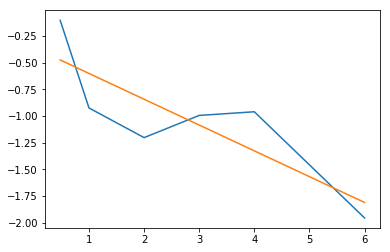

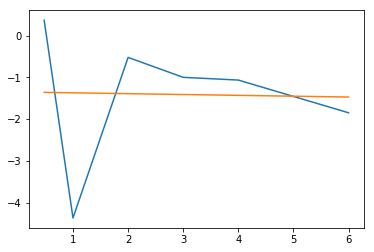

In [13]:
#Q1 (c)

import numpy as np
import matplotlib.pyplot as plt

avalue = (np.exp(-10)*((400001*np.exp(10))-400000))/(400000) # absolute value of error
avalue
e1 = [x - avalue for x in jk] # abs error from trap method
e2 = [x - avalue for x in ll] # abs error from MC method

#print(e1,e2)

lne1 = [np.log10(x) for x in e1] # converting to log10 to get the power
lne2 = [np.log10(x) for x in e2] # converting to log10 to get the power


lnN = [np.log10(x) for x in N]

poly1 = np.polyfit(lnN,lne1, 1) # curve fit
lnn_p1 = np.polyval(poly1, lnN) # evaluating value to calculate coeff

poly2 = np.polyfit(lnN,lne2, 1)
lnn_p2 = np.polyval(poly2, lnN)

print(poly1[0], "power1 ")
print(poly2[0],"power2 ")

plt.plot(lnN, lne1)
plt.plot(lnN, lnn_p)

plt.show()


plt.plot(lnN, lne2)
plt.plot(lnN, lnn_p2)
plt.show()

# one of slope comes really bad due to ln 1, which comes from a random value

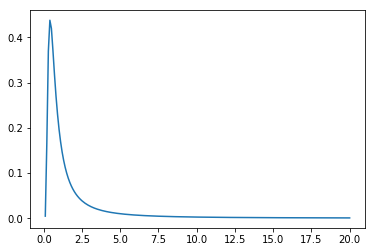

0.40000000000000002

In [50]:
#Q3
import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(0.1,20,200)
o = []
n = []

def f(x): # defining the fucntion
    return np.exp(1/x)/((1+np.exp(1/x))*x)**2

for i in r:
    o.append(f(i)) # funciton list
    n.append(i) # creting simple x point list
    

plt.plot(n,o)
plt.show()

np.max(o)
n[np.argmax(o)]

[4.8448, 5.2064, 5.344, 4.5568, 4.1472, 2.6624, 2.048]
[4, 5, 6, 7, 8, 9, 10]


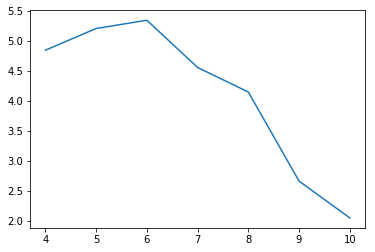

array(5.339216)

In [16]:
# Q4

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

it = 10000 #iterations 
b1 = []

#Defining a function as we have to call it multiple times for an n dimensional sphere

def vol(n):
    c = 0
    for i in range(it):
        
        p = np.random.uniform(-1.0, 1.0, n) # generating random numbers
        
        r = np.linalg.norm(p) # getting the norm of length
        
        if r < 1.0: # defining the radius to be of unit value
            c += 1

    return (2**n) * (c/it)

a1 = []

for i in range(4,11):  # finding the volume from dim =4 to dim =10
    a1.append(vol(i))  # creating a list of volume
    b1.append(i)

print(a1)
print(b1)

cs = CubicSpline(b1, a1) # scipy cublic spline function

plt.plot(b1,cs(b1))
plt.show()

cs(5.3) # calling the value of sphere of dim = 5.3

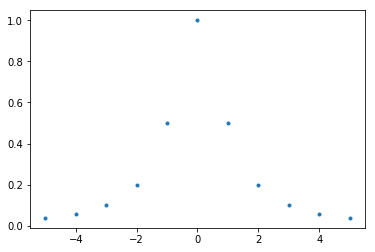

In [3]:
#Q5 (a)
import matplotlib.pyplot as plt

a = []
b = []

def f(i): # defining the fucntion
    return (1+i**2)**(-1)

for i in range(-5,6):
    a.append(f(i)) # funciton list
    b.append(i) # creting simple x point list
    

plt.plot(b,a,".")
plt.show()

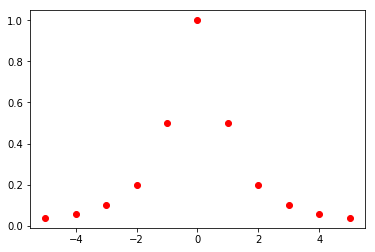

            10             9            8             7           6
-2.262e-05 x  - 3.611e-20 x + 0.001267 x + 7.619e-18 x - 0.02441 x
              5          4           3          2
 + 1.046e-16 x + 0.1974 x - 1.3e-16 x - 0.6742 x - 1.546e-16 x + 1


In [4]:
# Q5 (b)
import numpy as np
x = np.array(b)
y = np.array(a)

M = len(x) 

p = np.poly1d(0.0) 

for j in range(M):
    
    poly = np.poly1d(y[j]) 
    
    for k in range(M):
        
        if k != j:  #lagrange polynomial condition for when xi != xj
            
            poly *= np.poly1d([1.0, -x[k]])/(x[j]-x[k]) # lagrange polynomial 
            
    p += poly 
    
kk = np.polyval(p, x) #evaluating the polynomial at x values, we'll use these for the plot 

plt.plot(x,kk,"+") #Lagrange fit

plt.plot(b,a,"ro") # function fit

plt.show()
print(p) # 10 degree Lagrange polynomial

In [1]:
#Q5 (c)
from scipy.interpolate import CubicSpline
cs = CubicSpline(x, kk)
plt.plot(x,cs(x), "r") # cubic spline fit
plt.plot(b,a, "ro") # function fit
plt.show()

NameError: name 'x' is not defined